In [ ]:
import pandas as pd
import numpy as np
import copy, math
import matplotlib.pyplot as plt
import random as rd

data_file = "sample_data/heart-disease.csv"

heart_disease_data = pd.read_csv(data_file)
heart_disease_data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [ ]:
print(heart_disease_data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
#Correlation Matrix

correlation_Df = pd.DataFrame({"Correlation With Target": heart_disease_data.iloc[:,:13].corrwith(heart_disease_data["target"])}, index = heart_disease_data.columns[:13]).sort_values("Correlation With Target", ascending= False)
correlation_Df




,Correlation With Target
cp,0.433798
thalach,0.421741
slope,0.345877
restecg,0.137230
fbs,-0.028046
chol,-0.085239
trestbps,-0.144931
age,-0.225439
sex,-0.280937
thal,-0.344029


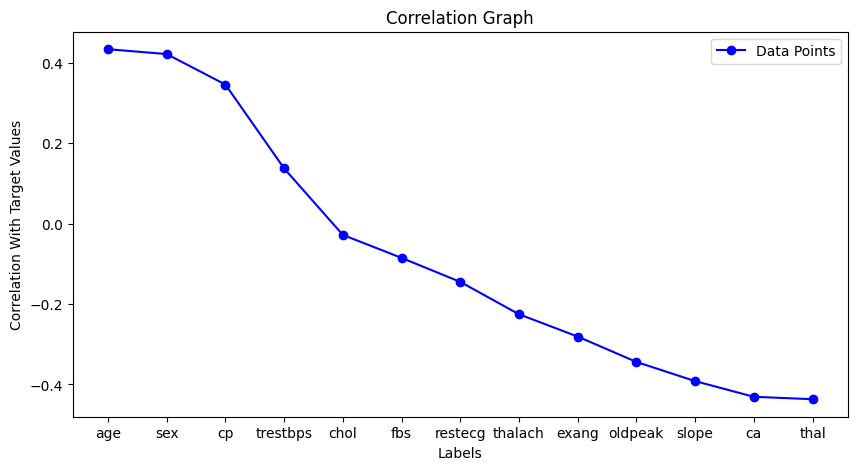

In [ ]:
plt.figure(figsize=(10, 5))  # Stretch horizontally, for example

x = heart_disease_data.columns[:13]
y = correlation_Df["Correlation With Target"]

plt.plot(x, y, color='blue', label="Data Points", marker="o")
plt.title("Correlation Graph")
plt.xlabel("Labels")
plt.ylabel("Correlation With Target Values")

plt.legend()

# Display the plot
plt.show()

based on correlation better to split feature set into 2 models first half show positive second are negative

In [ ]:
#first predictor model

features1 = ["cp", "thalach", "slope", "restecg"]
X_train, X_test, y_train, y_test = train_test_split(heart_disease_data[features1], heart_disease_data["target"], test_size=0.2, random_state=40)


log_class_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

log_class_pipeline.fit(X_train, y_train)


lg_model_pred = log_class_pipeline.predict(X_test)
lg_test_accuracy = accuracy_score(lg_model_pred, y_test)

print(lg_test_accuracy)



0.8032786885245902


In [ ]:
#second predictor model
features2 = ["fbs", "chol", "trestbps", "age", "sex", "thal", "ca", "oldpeak", "exang"]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(heart_disease_data[features2], heart_disease_data["target"], test_size=0.2, random_state=40)


log_class_pipeline_1 = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

log_class_pipeline_1.fit(X_train_1, y_train_1)


lg_model_pred_1 = log_class_pipeline_1.predict(X_test_1)
lg_test_accuracy_1 = accuracy_score(lg_model_pred_1, y_test_1)

print(lg_test_accuracy_1)


0.8360655737704918


In [ ]:
#third model with all features
features_all = list(heart_disease_data.columns[:13])
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(heart_disease_data[features_all], heart_disease_data["target"], test_size=0.2, random_state=40)


log_class_pipeline_2 = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

log_class_pipeline_2.fit(X_train_2, y_train_2)


lg_model_pred_2 = log_class_pipeline_2.predict(X_test_2)
lg_test_accuracy_2 = accuracy_score(lg_model_pred_2, y_test_2)

print(lg_test_accuracy_2)

0.8852459016393442


best logistic regression model is with only high correlation variables

In [ ]:
#best logistic regression model

features1 = ["cp", "thalach", "slope", "age", "sex", "thal", "ca", "oldpeak", "exang"]
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(heart_disease_data[features1], heart_disease_data["target"], test_size=0.2, random_state=40)


log_class_pipeline_3 = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

log_class_pipeline_3.fit(X_train_3, y_train_3)


lg_model_pred_3 = log_class_pipeline_3.predict(X_test_3)
lg_test_accuracy_3 = accuracy_score(lg_model_pred_3, y_test_3)

print(lg_test_accuracy_3)

0.9016393442622951


<function matplotlib.pyplot.legend(*args, **kwargs)>

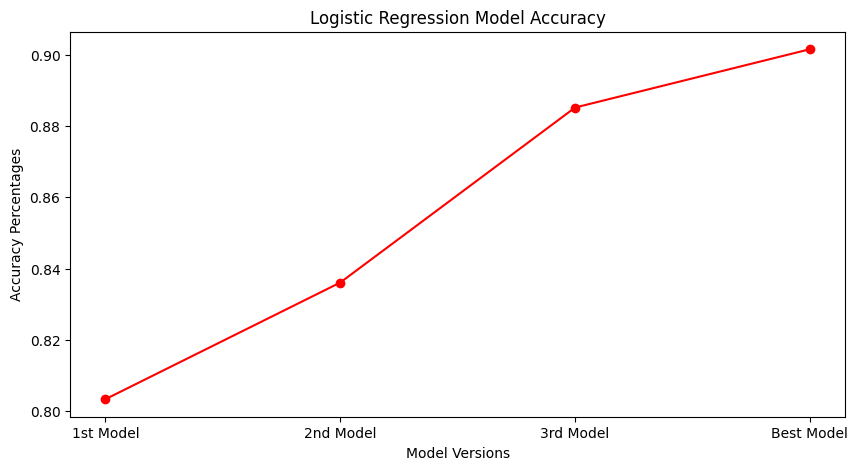

In [ ]:
#logistic regression model accuracy
plt.figure(figsize=(10, 5))  # Stretch horizontally, for example

x = ["1st Model" , "2nd Model" , "3rd Model" , "Best Model"]
y = [lg_test_accuracy, lg_test_accuracy_1, lg_test_accuracy_2, lg_test_accuracy_3]

plt.plot(x, y, color = "red", label = "Accuracy %" , marker = "o")
plt.title("Logistic Regression Model Accuracy")
plt.xlabel("Model Versions")
plt.ylabel("Accuracy Percentages")
plt.show
plt.legend


KNN Classifier Models

In [ ]:
#best knn classification model

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(heart_disease_data[features1], heart_disease_data["target"], test_size=0.2, random_state=40)

pipeline_knn = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

grid_cv = GridSearchCV(
    pipeline_knn,
    param_grid={
        "kneighborsclassifier__n_neighbors": range(1, 20)
    },
    scoring="accuracy",
    cv=10
)

grid_cv.fit(X_train_5, y_train_5)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 20)},
             scoring='accuracy')

In [ ]:
grid_cv.best_params_

knn_pred = grid_cv.best_estimator_.predict(X_test_5)
knn_best_accuracy = accuracy_score(knn_pred, y_test_5)
knn_best_accuracy


0.9016393442622951

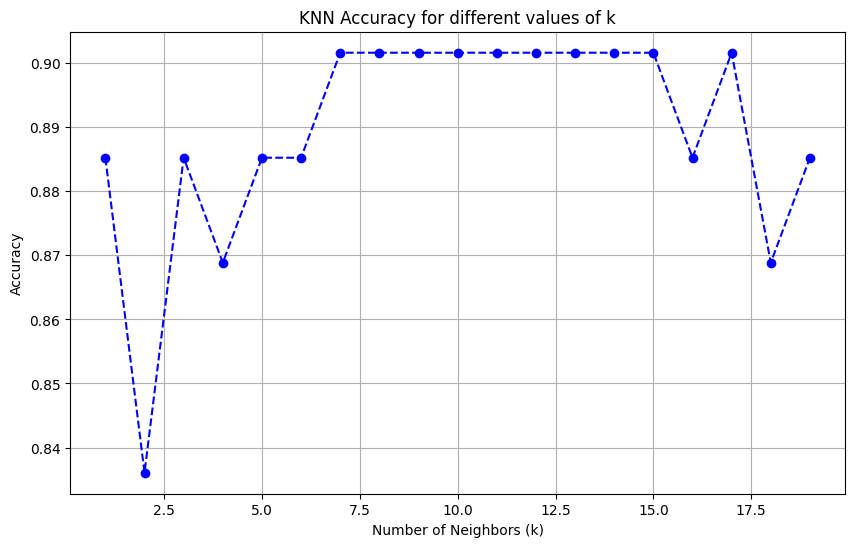

In [ ]:
#knn classification model graph

import matplotlib.pyplot as plt
import numpy as np

# Create an empty list to store accuracies for each k
k_range = range(1, 20)
accuracies = []

# Loop over k values to compute accuracy
for k in k_range:
    pipeline_knn = make_pipeline(
        StandardScaler(),
        KNeighborsClassifier(n_neighbors=k)
    )
    pipeline_knn.fit(X_train_5, y_train_5)
    knn_pred = pipeline_knn.predict(X_test_5)
    accuracies.append(accuracy_score(y_test_5, knn_pred))

# Plot the accuracy for each k
plt.figure(figsize=(10,6))
plt.plot(k_range, accuracies, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different values of k')
plt.grid(True)
plt.show()
